In [1]:
import xmltodict
import json
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

# 1. add images directory to data 

annotations_p = Path('data/annotations.xml')


with open(annotations_p) as fd:
    doc = xmltodict.parse(fd.read())

doc["annotations"].keys()

dict_keys(['version', 'meta', 'image'])

In [2]:
image_id = -2
doc["annotations"]["image"][image_id]

{'@id': '1',
 '@name': 'SA_20211012-165505_incision_crop_0.jpg',
 '@subset': 'default',
 '@task_id': '337',
 '@width': '233',
 '@height': '70',
 'polyline': [{'@label': 'Stitch',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '173.02,22.97;173.02,51.65',
   '@z_order': '0'},
  {'@label': 'Incision',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '17.69,38.60;215.06,35.01',
   '@z_order': '0',
   'attribute': {'@name': 'Type', '#text': 'Single'}},
  {'@label': 'Stitch',
   '@occluded': '0',
   '@source': 'manual',
   '@points': '138.16,22.97;139.18,50.90',
   '@z_order': '0'}]}

In [3]:
data = {}

for image_id, image in enumerate(doc["annotations"]["image"]):
  if "polyline" in image:
      polylines = []
      labels = []
      if type(image['polyline']) == dict:
         labels.append(image['polyline']['@label'])
      else:
        labels = [pl['@label'] for pl in image['polyline']]
      for pline in image["polyline"]:
        if type(image['polyline']) == dict: # not a list of dicts ... single item
            pts = [pt.split(",") for pt in image['polyline']["@points"].split(";")]
            polylines.append(pts)
            break  
        pts = [pt.split(",") for pt in pline["@points"].split(";")]  # extract coodrinates
        polylines.append(pts)

      data[image_id] = {'label': labels, 'points': polylines, 'file': image['@name']}
        #plt.plot(pts[:,0], pts[:, 1])

json_p = Path('data/data.json')
with open(json_p, 'w') as f: 
   json.dump(data, f)

(array([118.,  12.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

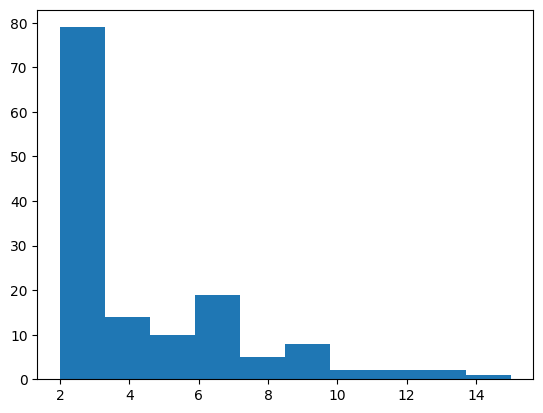

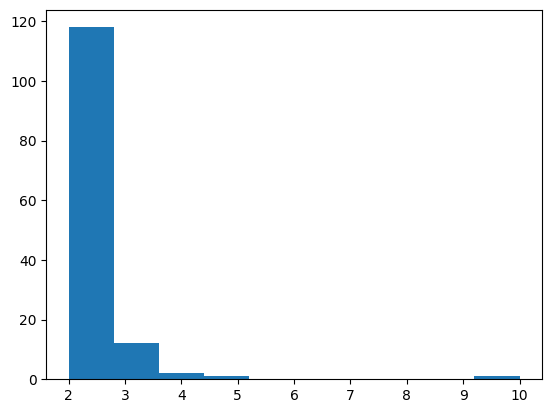

In [6]:
# validate data
incisions_len = {}
stitches_len = {}
for image_id, image in data.items():
    count = len(image['label'])
    if len(image['points']) != count: 
        print(f"wrong number of points for image id {image_id}")
    for lidx, l in enumerate(image['label']):
        pts = image['points'][lidx]
        if l == 'Stitch': 
            stitches_len[image_id] = len(pts)
        elif l == 'Incision':
            incisions_len[image_id] = len(pts)

plt.hist(incisions_len.values())
plt.figure()
plt.hist(stitches_len.values())